In [29]:
%pip install numpy matplotlib 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import matplotlib.pyplot as plt


class NURBS:
    def __init__(self, control_points, weight, knot_vector, degree):
        self.p = degree
        self.W = weight
        self.U = knot_vector
        self.P = control_points
        self.n = len(self.P)

    def __basis_function(self, t, i, p):
        if p == 0:
            if self.U[i] <= t and t < self.U[i + 1]:
                return 1
            else:
                return 0
        else:  # can be optimized
            B1 = self.__basis_function(t, i, p - 1)
            B2 = self.__basis_function(t, i + 1, p - 1)
            if B1 == 0:
                N1 = 0
            else:
                N1 = B1 * (t - self.U[i]) / (self.U[i + p] - self.U[i])
            if B2 == 0:
                N2 = 0
            else:
                N2 = B2 * (self.U[i + p + 1] - t) / (self.U[i + p + 1] - self.U[i + 1])
            # l1 = (t - U[i]) / (U[i+p] - U[i])
            # l2 = (U[i+p+1] - t) / (U[i+p+1] - U[i+p])

            # return basis_function(t, i, p-1, U) * l1 + \
            #    basis_function(t, i+1, p-1, U)* l2
            return N1 + N2

    def __rational_basis_function(self, t, i, p):
        sum = 0
        for j in range(self.n):
            sum += self.W[j] * self.__basis_function(t, j, p)
        return self.__basis_function(t, i, p) * self.W[i] / sum

    def get_pos(self, t):
        pos = np.zeros([1, 2])
        for i in range(self.n):
            pos += (
                self.__rational_basis_function(t, i, self.p)
                * self.P[i]
            )
        return pos

In [31]:
# use nurbs to draw a perfect circle
degree = 3  # p : spline order
# control points
control_points = np.array(
    [
        (54.493, 52.139),
        (55.507, 52.139),
        (56.082, 49.615),
        (56.780, 44.971),
        (69.575, 51.358),
        (77.786, 58.573),
        (90.526, 67.081),
        (105.973, 63.801),
        (100.400, 47.326),
        (94.567, 39.913),
        (92.369, 30.485),
        (83.440, 33.757),
        (91.892, 28.509),
        (89.444, 20.393),
        (83.218, 15.446),
        (87.621, 4.830),
        (80.945, 9.267),
        (79.834, 14.535),
        (76.074, 8.522),
        (70.183, 12.550),
        (64.171, 16.865),
        (59.993, 22.122),
        (55.680, 36.359),
        (56.925, 24.995),
        (59.765, 19.828),
        (54.493, 14.940),
        (49.220, 19.828),
        (52.060, 24.994),
        (53.305, 36.359),
        (48.992, 22.122),
        (44.814, 16.865),
        (38.802, 12.551),
        (32.911, 8.521),
        (29.152, 14.535),
        (28.040, 9.267),
        (21.364, 4.830),
        (25.768, 15.447),
        (19.539, 20.391),
        (17.097, 28.512),
        (25.537, 33.750),
        (16.602, 30.496),
        (14.199, 39.803),
        (8.668, 47.408),
        (3.000, 63.794),
        (18.465, 67.084),
        (31.197, 58.572),
        (39.411, 51.358),
        (52.204, 44.971),
        (52.904, 49.614),
        (53.478, 52.139),
        (54.492, 52.139),
    ]
)
# Knot vector
U = np.array(
    [
        0,
        0,
        0,
        0,
        0.0083,
        0.015,
        0.0361,
        0.0855,
        0.1293,
        0.1509,
        0.1931,
        0.2273,
        0.2435,
        0.2561,
        0.2692,
        0.2889,
        0.3170,
        0.3316,
        0.3482,
        0.3553,
        0.3649,
        0.3837,
        0.4005,
        0.4269,
        0.4510,
        0.4660,
        0.4891,
        0.5000,
        0.5109,
        0.5340,
        0.5489,
        0.5731,
        0.5994,
        0.6163,
        0.6351,
        0.6447,
        0.6518,
        0.6683,
        0.6830,
        0.7111,
        0.7307,
        0.7439,
        0.7565,
        0.7729,
        0.8069,
        0.8491,
        0.8707,
        0.9145,
        0.9639,
        0.9850,
        0.9917,
        1.0,
        1.0,
        1.0,
        1.0,
    ]
)  
# weight (if all w are 1, equals to B-Spline)
w = np.array(
    [
        1.0,
        1.0,
        1.0,
        1.2,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1,
        2,
        1.0,
        1.0,
        5.0,
        3.0,
        1.0,
        1.1,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.1,
        1.0,
        3.0,
        5.0,
        1.0,
        1.0,
        2.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.0,
        1.2,
        1.0,
        1.0,
        1.0,
    ]
)  

In [32]:
my_nurbs = NURBS(control_points, w, U, degree)

In [34]:
tt = np.linspace(0, 1, 1000)
y = np.zeros([1000, 2])
for i in range(1000):
    y[i] = my_nurbs.get_pos(tt[i])

C:\Users\xy-wu\AppData\Local\Temp\ipykernel_56608\1069049389.py:41: RuntimeWarning: invalid value encountered in scalar divide
  return self.__basis_function(t, i, p) * self.W[i] / sum


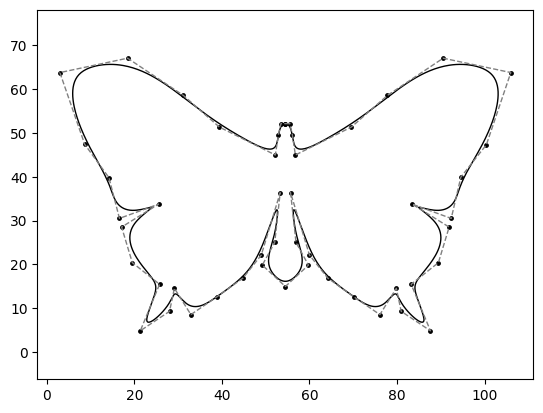

In [43]:
plt.scatter(control_points[:, 0], control_points[:, 1], s=6, c="k")
plt.plot(y[:, 0], y[:, 1], c="k", linewidth=1)
plt.plot(control_points[:, 0], control_points[:, 1], c="gray", linestyle="--", linewidth=1)
plt.axis("equal")
plt.show()